In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('C:/Users/THARMI/Downloads/playground-series-s4e8/train.csv')

# Encode categorical variables
data_encoded = data.apply(LabelEncoder().fit_transform)


In [3]:
data.head(3)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w


In [4]:
#Split the Data into Features (X) and Target (y):
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']


In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
#Split the Dataset into Training and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
model = DecisionTreeClassifier()

In [9]:
#Train the Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
import pickle

In [11]:
with open('mushroom_model.pkl','wb')as file:
    pickle.dump(model,file)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
with open('mushroom_model.pkl','rb') as file:
    mp = pickle.load(file)

In [36]:
#Make Predictions
y_pred = model.predict(X_test)


In [38]:
print(y_pred)

[1 1 0 ... 1 0 1]


In [13]:
#Calculate Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.20%


In [14]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[280187   2210]
 [  2795 338197]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282397
           1       0.99      0.99      0.99    340992

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



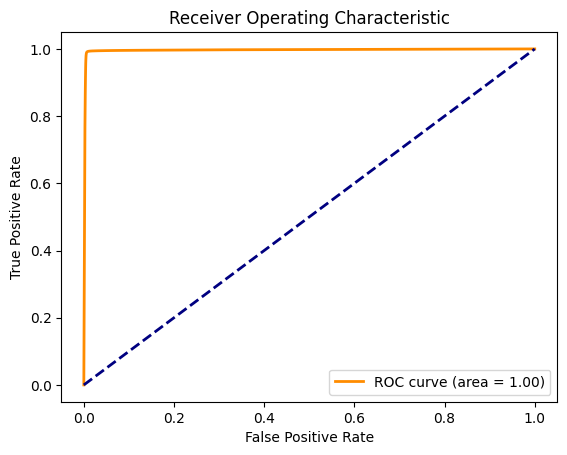

In [15]:
#ROC-AUC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
